In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from dataclasses import dataclass

import vice
import pickle

import sys
sys.path.append("../..")

In [3]:
import surp.analysis_scripts.apogee_analysis as aah
from surp.analysis_scripts.vice_model import vice_model
import surp.analysis_scripts.plotting_utils as pluto
import surp.analysis_scripts.gas_phase_data
import surp.analysis_scripts.rc_params

In [4]:
sf = pluto.fig_saver("../figures")

In [5]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    version: str = ""
    

In [6]:
def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta + id.version
    else:
        name = id.name
    file_name = "../output/" + name + ".json"
    return vice_model(file_name)

In [7]:
def compare_cooh(models, ax=None):
    if ax is None:
        ax = plt.gca()
        
    name_0 = list(models.keys())[0]
    i = 0
    for name, model in models.items():
        f = model.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.6), label=name, plot_data=False, ax=ax)
        i+= 1
    # legend_outside()
    aah.plot_cooh()
    return f    

    
def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()
            
def compare_cooh_stars(models):
    for name, model in models.items():
        model.plot_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.6), label=name)
        plt.title(name)
        plt.show()

In [8]:
def compare_coofe(models):
    name_0 = list(models.keys())[0]

    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.6, 0.4), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee")
        plt.title("[O/H] = %1.1f" % o)
        pluto.legend_outside()  
        plt.show()

def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()

In [9]:
def plot_coofe(models, o0=-0.0, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]

    for o in [o0]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.3, 0.3), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee", ax=ax)
        ax.set_title("[O/H] = %1.1f" % o)
        # legend_outside()  
        # plt.show()


In [10]:
def compare_mdf(models):
    for ratio in ["[o/h]", "[fe/h]", "[o/fe]", "[c/o]", "[c/h]"]:
        for name, model in models.items():
            model.plot_mdf(ratio, label = name, xlim=(-1.5, 1))
        legend_outside()
        plt.show()

In [11]:
def compare_stars(model_names, labels=None):
    if labels is None:
        labels = model_names
        
    models = {label: find_model(name) for label, name in zip(labels, model_names)}
    
    compare_cooh_stars(models)
    compare_coofe_stars(models)

In [12]:
def compare(names, labels):
    models = {label: find_model(name) for name, label in zip(names, labels)}
    
    fig, axs = pluto.dual_plot()
    
    plt.sca(axs[0])
    compare_cooh(models)  

    axs[0].set(
        xlabel = r"[$\alpha$/H]",
        ylabel = r"[C/$\alpha$]", 
        xlim = (-0.6, 0.6), 
        ylim = (-0.5, 0.2),
        # xticks = [-0.6, -0.4, -0.2, 0, 0.2]
    )
    
    plt.sca(axs[1])
    plot_coofe(models)
    pluto.fancy_legend()
    
    axs[1].set(
        xlabel = r"[$\alpha$/Fe]",
        ylabel = "",
        title = "",
        xlim = (-0.15, 0.4),
       # xticks = [-0.1, -0.2, -0.1, 0, 0.1]
    )


## Out of Box AGB models

In [26]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="o", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

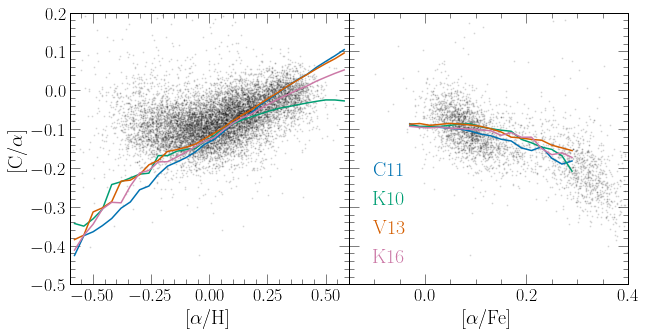

In [28]:
compare(names, labels)
sf("oob_agb")

# Cristallo 11

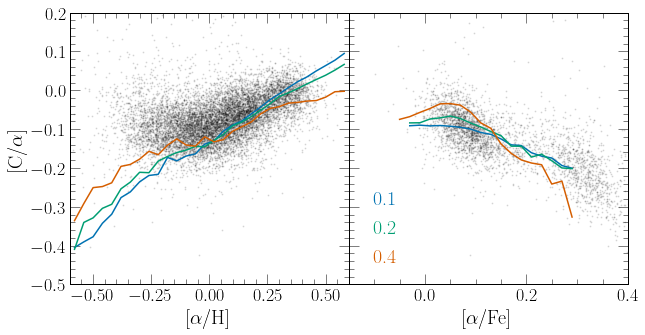

In [13]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb="cristallo11", f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["0.1", "0.2", "0.4"]
compare(names, labels)

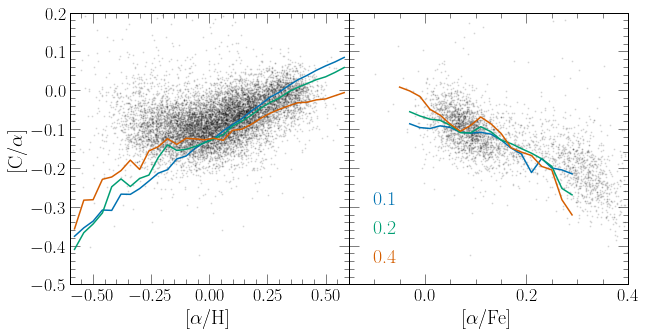

In [14]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb="cristallo11", f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3_lateburst"))
labels = ["0.1", "0.2", "0.4"]
compare(names, labels)

# K10

In [16]:
agb = "karakas10"

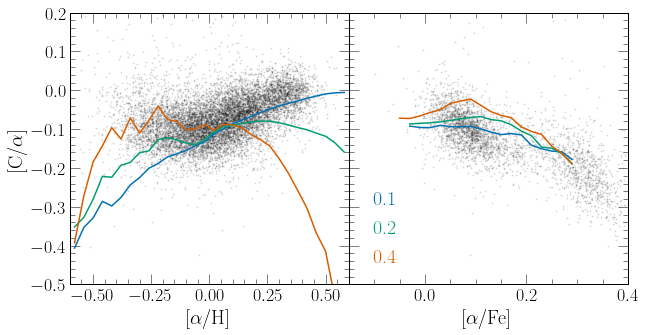

In [17]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb=agb, f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["0.1", "0.2", "0.4"]
compare(names, labels)

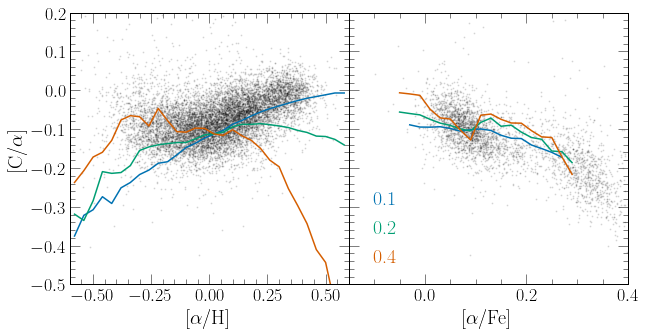

In [18]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb=agb, f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3_lateburst"))
labels = ["0.1", "0.2", "0.4"]
compare(names, labels)

# V13

In [19]:
agb = "ventura13"

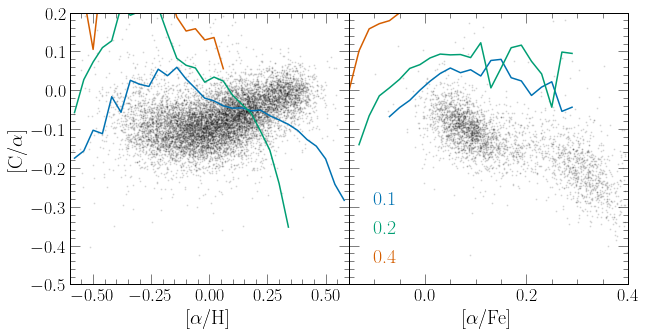

In [20]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb=agb, f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["0.1", "0.2", "0.4"]
compare(names, labels)

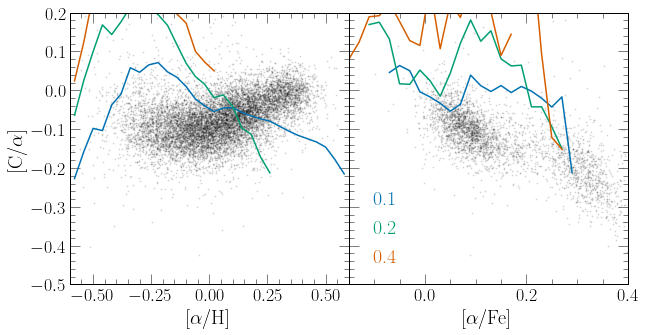

In [21]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb=agb, f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3_lateburst"))
labels = ["0.1", "0.2", "0.4"]
compare(names, labels)

# K16

In [22]:
agb = "karakas16"

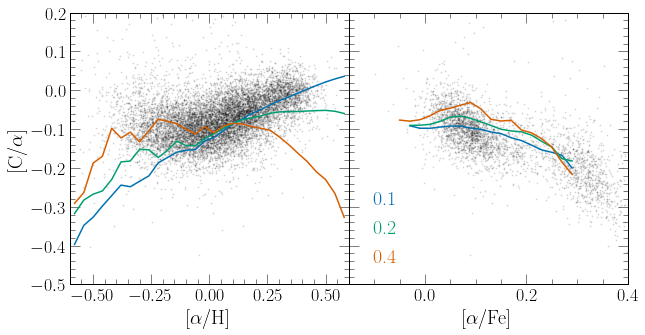

In [23]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb=agb, f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["0.1", "0.2", "0.4"]
compare(names, labels)

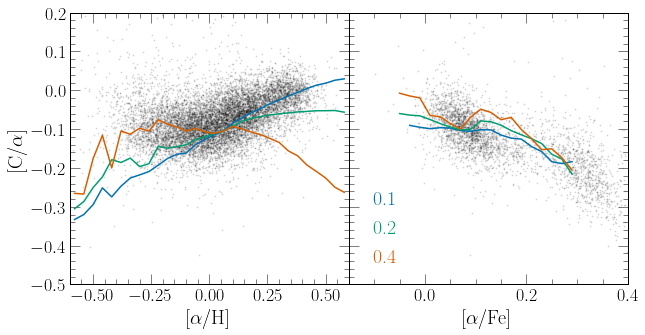

In [24]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb=agb, f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3_lateburst"))
labels = ["0.1", "0.2", "0.4"]
compare(names, labels)

# This is where the chaos begin

In [ ]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="0.2", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

In [ ]:

df = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0", beta="0.6", version="_v0.1.3")).history
for o0 in [-0.2, 0, 0.2]:

    sl = df["[o/h]"] > o0-0.05
    sl &= df["[o/h]"] < o0 + 0.05

    plot_mean_track(df[sl]["[o/fe]"], df[sl]["[c/o]"], label="%1.1f" % o0, xlim=(-0.2, 0.5))


    
df = subgiants
for o0 in [-0.2, 0, 0.2]:
    sl = df["MG_H"] > o0-0.05
    sl &= df["MG_H"] < o0 + 0.05

    plot_mean_track(df[sl]["MG_FE"], df[sl]["C_MG"], label="%1.1f" % o0, ls="--", xlim=(-0.2, 0.5))



plt.legend()

plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")


plt.legend()



plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")